Augur Node is designed to be a standalone application, including a local database setup that supports sqlite as well as postgresql. We use knex to manage the local migrations and schema changes.

In order to work with a SQLite database from Python, we first have to connect to it. We can do that using the connect function, which returns a Connection object:

In [1]:
import sqlite3
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import datetime
from matplotlib.pyplot import figure




conn = sqlite3.connect("/Users/Deepesh.Chaudhari/Library/Application Support/augur/augur-1-4.db")

In [2]:
cur = conn.cursor()

Once we have a Cursor object, we can use it to execute a query against the database with the aptly named execute method. The below code will fetch the first 5 rows from the  table:

In [3]:
cur.execute("select marketId,volume from markets limit 5")

In [4]:
results = cur.fetchall()
print(results)

[('0x5d192f598ff29318013b3f269ae37590aa75b5f9', '26.981162775'), ('0x48628e5832d32ff6e8b722fe820bb9add7ba3c6b', '1.24'), ('0x4e64d886cb5f34c82293093d419c64ea95b8fc49', '85.31676675'), ('0x2bcbe4d152b784d876d5dc236fea2a1c1a2d2934', '0.0101'), ('0x766f7606e9239e8a54d367b98f770912de135b9f', '0.3')]


# Network Growth

In [108]:
growth_df = pd.read_csv("../data/processed/networkgrowth.csv",delimiter=';')

In [114]:
growth_df.dropna(inplace=True)

In [118]:
growth_df.drop(index=35,inplace=True)

In [149]:
growth_df.tail()

,Time,Price,Network Growth,pricechange,networkchange
376,2019-06-14,0.222466,116.0,0.014017,0.045045
377,2019-06-15,0.223886,133.0,0.006387,0.146552
378,2019-06-16,0.229578,119.0,0.025420,-0.105263
379,2019-06-17,0.223063,117.0,-0.028376,-0.016807
380,2019-06-18,0.221879,116.8,-0.005311,-0.001709


In [148]:
growth_df["Network Growth"].describe()

count    345.000000
mean      86.668986
std       63.814690
min       29.000000
25%       55.000000
50%       71.000000
75%      103.000000
max      884.000000
Name: Network Growth, dtype: float64

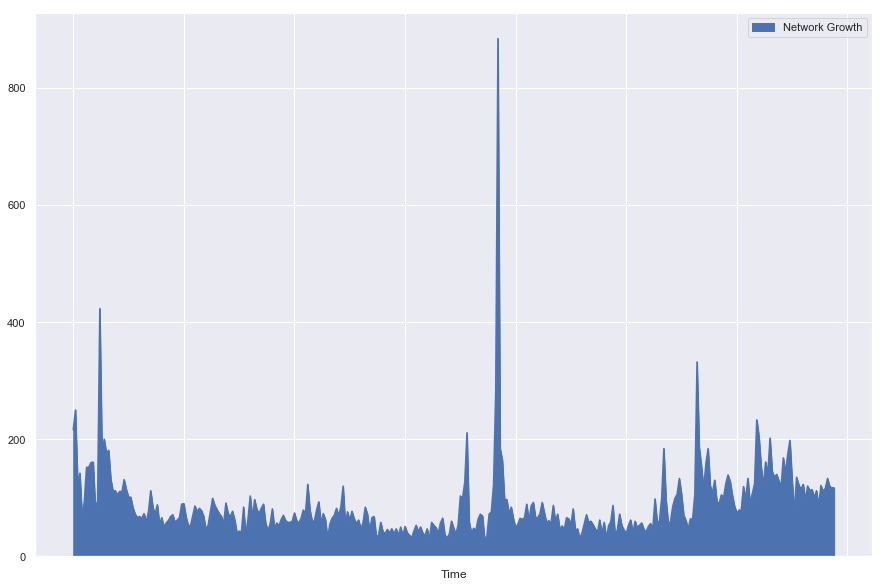

In [145]:
growth_df[["Time", "Network Growth"]].set_index("Time").plot.area()

In [130]:
growth_df["pricechange"] = growth_df["Price"].pct_change()

In [132]:
growth_df["networkchange"] = growth_df["Network Growth"].pct_change()

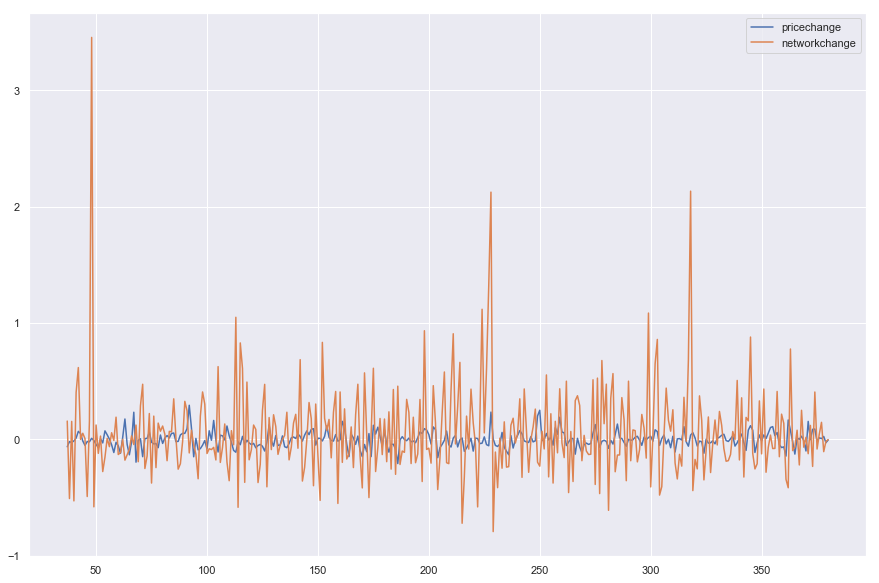

In [136]:
growth_df[["pricechange","networkchange"]].plot()

In [100]:
uniqueAddress = pd.read_csv("../data/external/Augurusers.csv")

In [101]:
uniqueAddress.head()

,dau,volume,date
0,1,0.0000,2018-07-08
1,0,0.0000,2018-07-09
2,265,296.6761,2018-07-10
3,256,999.0840,2018-07-11
4,143,200.1692,2018-07-12


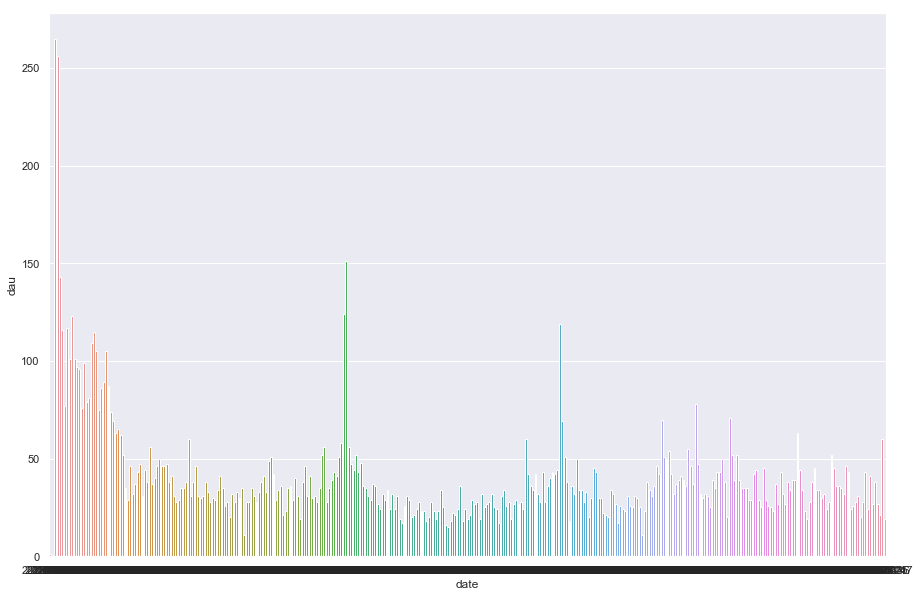

In [187]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(x="date", y='dau', data=uniqueAddress)


In [198]:
dau = pd.read_csv("../data/processed/dau.csv",delimiter=';')
dau.dropna(inplace=True)

In [200]:
dau.head()

,Time,Daily Active Addresses,Price
115,2018-06-03,825.0,1.885079
116,2018-06-04,659.0,2.059008
117,2018-06-05,954.0,3.520437
118,2018-06-06,1039.0,3.968098
119,2018-06-07,1143.0,3.103128


# Deposits

In [175]:
processed = pd.read_csv("../data/processed/deposits.csv",delimiter=';')

In [176]:
processed.dropna(inplace=True)

In [177]:
processed.shape

(345, 3)

In [202]:
speculation_df = processed.merge(dau, on='Time')

In [203]:
speculation_df.head()

,Time,Price_x,Daily Active Deposits,Daily Active Addresses,Price_y
0,2018-07-08,1.032099,26709.0,172.0,1.032099
1,2018-07-09,0.965647,26.0,140.0,0.965647
2,2018-07-10,0.904698,56.0,118.0,0.904698
3,2018-07-11,0.887546,50.0,90.0,0.887546
4,2018-07-12,0.863575,62.0,670.0,0.863575


In [204]:
speculation_df.drop(index=0,inplace=True)

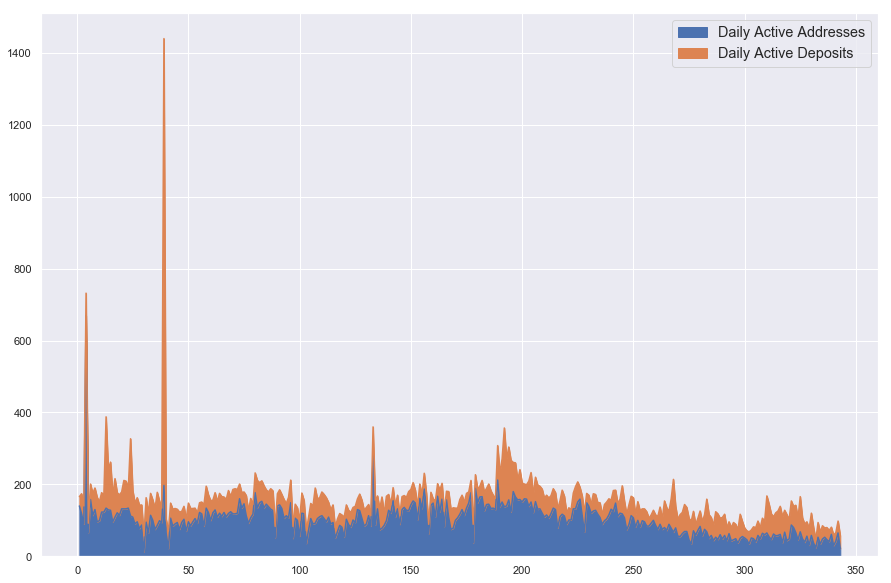

In [209]:
speculation_df[["Daily Active Addresses","Daily Active Deposits"]].plot.area()
sns.set(rc={'figure.figsize':(15,10)})
plt.legend(fontsize="large")

# Market Creation

In [57]:
marketcreation = pd.read_json("../data/external/AugurJsonFIles/countsAndFees.json").transpose()
marketcreation.reset_index(inplace=True)
marketcreation.rename(index=str, columns={"index": "Date"},inplace=True)

In [58]:
marketcreation.head()

,Date,creationCount,creationFee,finalizationCount,marketCreatorFeeRate,reportingFeeRate,timestamp
0,2018-07-10,"{'yesNo': 67, 'categorical': 24, 'scalar': 2}","{'arr': ['0.01', '0.01', '0.01', '0.01', '0.01...","{'notInvalid': 0, 'invalid': 0}","{'arr': ['0.01', '0', '0.01', '0.025', '0.01',...","{'arr': ['0.0001', '0.0001', '0.0001', '0.0001...",1531267185
1,2018-07-11,"{'yesNo': 66, 'categorical': 18, 'scalar': 2}","{'arr': ['0.01', '0.01', '0.01', '0.01', '0.01...","{'notInvalid': 0, 'invalid': 0}","{'arr': ['0.01', '0.01', '0.01', '0.01', '0.01...","{'arr': ['0.0001', '0.0001', '0.0001', '0.0001...",1531353585
2,2018-07-12,"{'yesNo': 19, 'categorical': 8, 'scalar': 0}","{'arr': ['0.01', '0.01', '0.01', '0.01', '0.01...","{'notInvalid': 0, 'invalid': 0}","{'arr': ['0', '0', '0.01515151515151515152', '...","{'arr': ['0.0001', '0.0001', '0.0001', '0.0001...",1531439985
3,2018-07-13,"{'yesNo': 21, 'categorical': 9, 'scalar': 9}","{'arr': ['0.01', '0.01', '0.01', '0.01', '0.01...","{'notInvalid': 0, 'invalid': 0}","{'arr': ['0', '0.00952380952380952381', '0.001...","{'arr': ['0.0001', '0.0001', '0.0001', '0.0001...",1531526385
4,2018-07-14,"{'yesNo': 16, 'categorical': 2, 'scalar': 0}","{'arr': ['0.01', '0.01', '0.01', '0.01', '0.01...","{'notInvalid': 0, 'invalid': 0}","{'arr': ['0.0001', '0', '0.01', '0.01', '0.02'...","{'arr': ['0.0001', '0.0001', '0.0001', '0.0001...",1531612785


In [59]:
marketcreation = pd.concat([marketcreation.drop(['creationCount'], axis=1), marketcreation['creationCount'].apply(pd.Series)], axis=1)

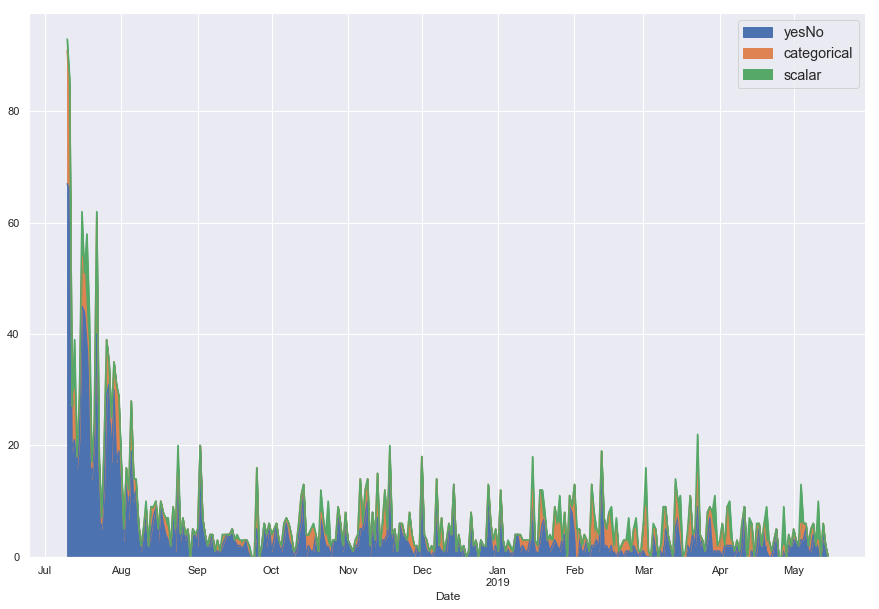

In [60]:
marketcreation[["Date","yesNo","categorical","scalar"]].set_index('Date').plot.area()
sns.set(rc={'figure.figsize':(15,10)})
plt.legend(fontsize="large")

In [61]:
marketcreationcost = pd.read_json("../data/external/AugurJsonFIles/creationCost.json").transpose()
marketcreationcost.reset_index(inplace=True)
marketcreationcost.rename(index=str, columns={"index": "Date"},inplace=True)

In [62]:
marketcreationcost.describe()

,noShowBondInRep,timestamp,validityBondInEth
count,310.000000,3.100000e+02,310.000000
mean,8.210501,1.544616e+09,0.019669
std,9.986775,7.743656e+06,0.016735
min,0.349681,1.531267e+09,0.010000
25%,1.036057,1.537942e+09,0.010676
50%,3.308197,1.544616e+09,0.012420
75%,11.902515,1.551290e+09,0.019825
max,41.403566,1.557881e+09,0.091966


In [63]:
marketcreationcost.head()

,Date,noShowBondInRep,timestamp,validityBondInEth
0,2018-07-10,0.349681,1.531267e+09,0.01
1,2018-07-11,0.349681,1.531354e+09,0.01
2,2018-07-12,0.349681,1.531440e+09,0.01
3,2018-07-13,0.349681,1.531526e+09,0.01
4,2018-07-14,0.349681,1.531613e+09,0.01


/Users/Deepesh.Chaudhari/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


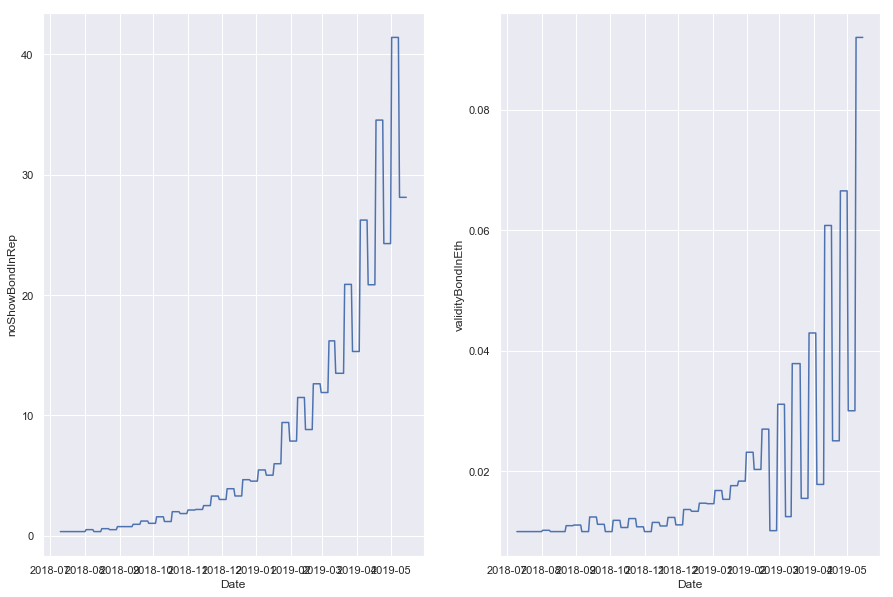

In [64]:
fig, ax =plt.subplots(1,2)
sns.lineplot(x="Date" ,y='noShowBondInRep', ax=ax[0],data=marketcreationcost)
sns.lineplot(x="Date",y='validityBondInEth', ax=ax[1],data=marketcreationcost)
sns.set(rc={'figure.figsize':(10,20)})
fig.show()

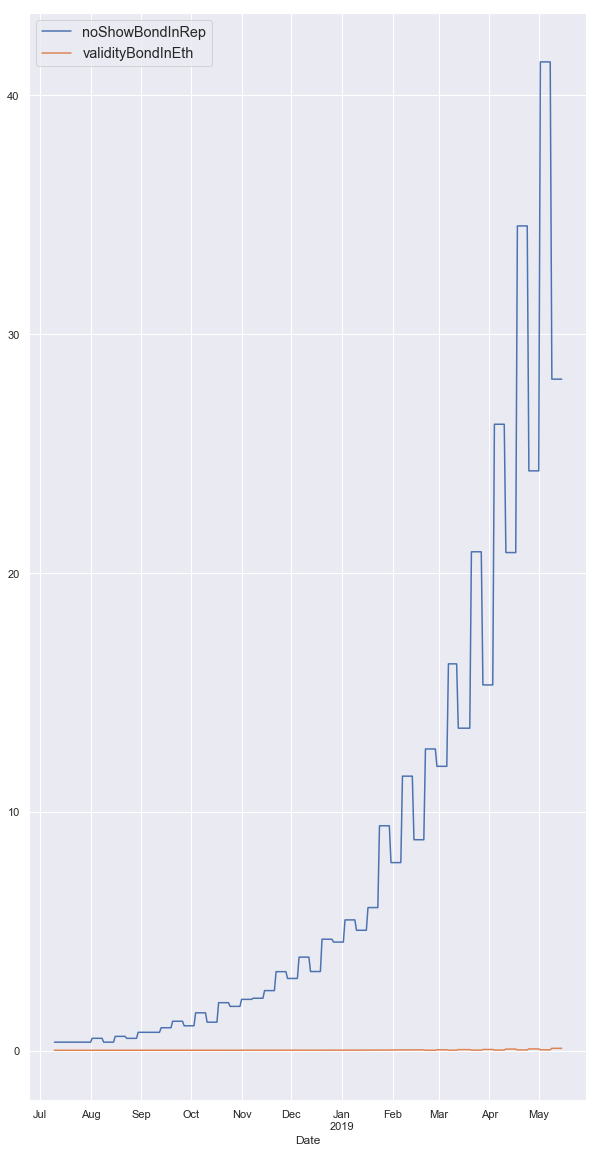

In [65]:
marketcreationcost[["Date","noShowBondInRep","validityBondInEth"]].set_index('Date').plot()
sns.set(rc={'figure.figsize':(15,10)})
plt.legend(fontsize="large")

In [66]:
marketcreation = pd.concat([marketcreation.drop(['finalizationCount'], axis=1), marketcreation['finalizationCount'].apply(pd.Series)], axis=1)

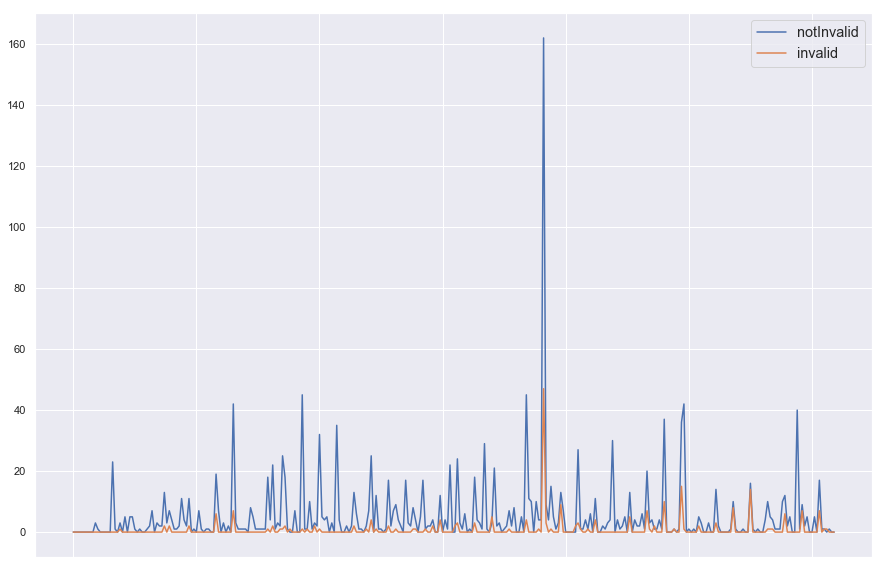

In [75]:
marketcreation[['notInvalid', 'invalid']].plot()
sns.set(rc={'figure.figsize':(15,10)})
plt.legend(fontsize="large")

# Trading

In [84]:
trading_df = pd.read_json("../data/external/AugurJsonFIles/tradingActivity.json").transpose()
trading_df.reset_index(inplace=True)
trading_df.rename(index=str, columns={"index": "Date"},inplace=True)

In [87]:
trading_df.head()

,Date,numberOfOrders,volume,trader
0,2018-07-10,"{'filled': 193, 'created': 340, 'canceled': 31}",71.0137,"{'all': 414, 'unique': 120}"
1,2018-07-11,"{'filled': 154, 'created': 249, 'canceled': 46}",191.842,"{'all': 268, 'unique': 99}"
2,2018-07-12,"{'filled': 32, 'created': 73, 'canceled': 16}",35.1281,"{'all': 69, 'unique': 40}"
3,2018-07-13,"{'filled': 53, 'created': 131, 'canceled': 40}",115.18,"{'all': 113, 'unique': 61}"
4,2018-07-14,"{'filled': 46, 'created': 102, 'canceled': 20}",144.097,"{'all': 82, 'unique': 42}"


In [86]:
trading_df = pd.concat([trading_df.drop(['numberOfAddresses'], axis=1), trading_df['numberOfAddresses'].apply(pd.Series)], axis=1)


In [88]:
trading_df = pd.concat([trading_df.drop(['trader'], axis=1), trading_df['trader'].apply(pd.Series)], axis=1)

Text(0,0.5,'Volume')

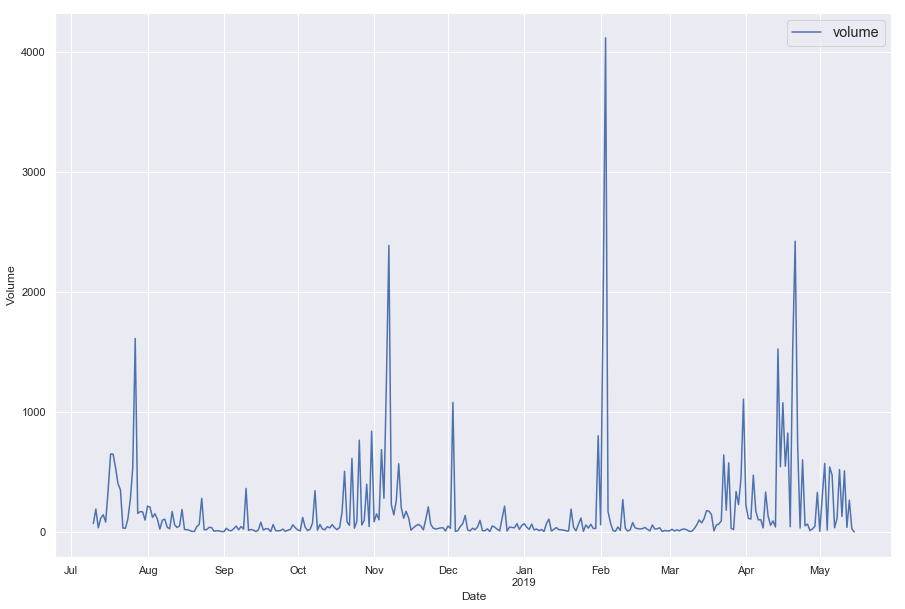

In [99]:
trading_df[["Date","volume"]].set_index('Date').plot()
sns.set(rc={'figure.figsize':(15,10)})
plt.legend(fontsize="large")
plt.ylabel("Volume")

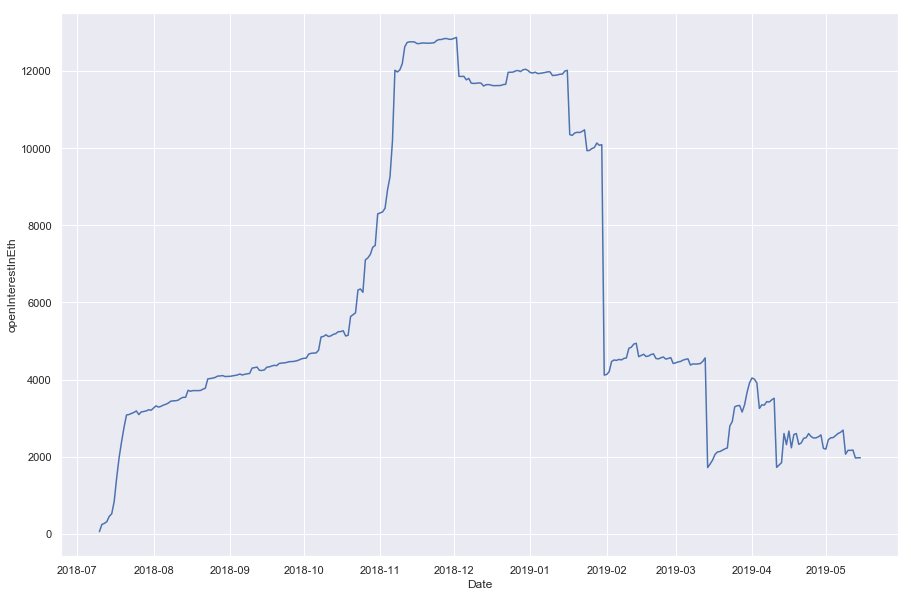

In [81]:
ax = sns.lineplot(x="Date", y="openInterestInEth", data=openInterestInEth, legend="full")
sns.set(rc={'figure.figsize':(10,10)})

# Volume

In [212]:
def get_market_data(market, tag=True):
    market_data = pd.read_html("https://coinmarketcap.com/currencies/" + market + 
                                     "/historical-data/?start=20180710&end="+time.strftime("%Y%m%d"), flavor='html5lib')[0]
    market_data = market_data.assign(Date=pd.to_datetime(market_data['Date']))  
    market_data['Volume'] = (pd.to_numeric(market_data['Volume'], errors='coerce').fillna(0))
    if tag:
        market_data.columns = [market_data.columns[0]] + [tag + '_' + i for i in market_data.columns[1:]]
        return market_data

In [213]:
def show_plot(data, tag):
    fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
    ax1.set_ylabel('Closing Price ($)',fontsize=12)
    ax2.set_ylabel('Volume ($ bn)',fontsize=12)
    ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
    ax2.set_yticklabels(range(10))
    ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
    ax1.set_xticklabels('')
    ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
    ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
    ax1.plot(data['Date'].astype(datetime.datetime),data[tag +'_Open*'])
    ax2.bar(data['Date'].astype(datetime.datetime).values, data[tag +'_Volume'].values)
    fig.tight_layout()
    figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.show()

In [214]:
REP_data = get_market_data("augur", tag='REP')
ETH_data = get_market_data("ethereum", tag='ETH')

In [215]:
REP_data.head()

,Date,REP_Open*,REP_High,REP_Low,REP_Close**,REP_Volume,REP_Market Cap
0,2019-06-18,18.73,19.05,17.90,18.08,7220553,198838500
1,2019-06-17,18.74,19.09,18.50,18.73,6507772,206036912
2,2019-06-16,18.77,19.54,18.50,18.73,11192518,206065980
3,2019-06-15,18.31,19.06,18.09,18.76,9189327,206347163
4,2019-06-14,18.45,19.16,17.68,18.31,13043497,201358871


In [216]:
ETH_data.head()

,Date,ETH_Open*,ETH_High,ETH_Low,ETH_Close**,ETH_Volume,ETH_Market Cap
0,2019-06-18,274.32,274.32,263.14,265.05,6205242504,28240458529
1,2019-06-17,269.09,275.44,268.35,274.35,6009795781,29227567867
2,2019-06-16,268.90,278.14,265.54,269.22,9676746453,28677606760
3,2019-06-15,263.93,271.51,262.12,269.02,8126853944,28652203067
4,2019-06-14,256.18,265.37,254.15,264.09,8676891267,28123338884


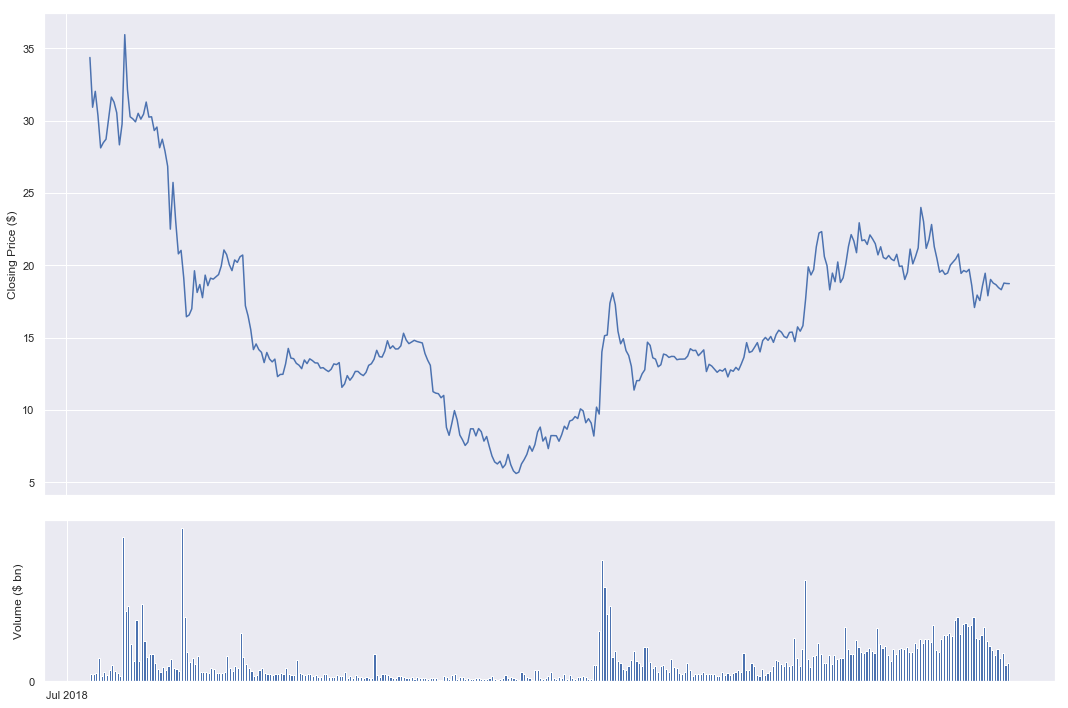

<Figure size 800x800 with 0 Axes>

In [217]:
show_plot(REP_data, tag='REP')

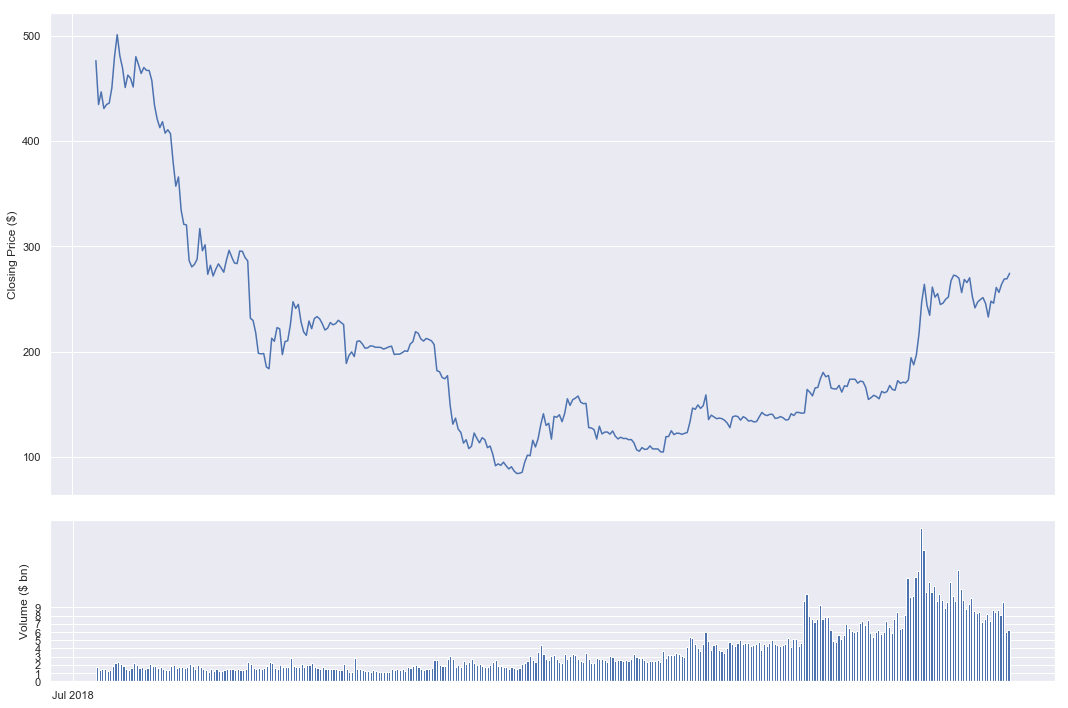

<Figure size 800x800 with 0 Axes>

In [222]:
show_plot(ETH_data, tag='ETH')


In [219]:
sql_query = "select * from markets limit 1;"

In [9]:
df = pd.read_sql_query(sql_query, conn)
df.transpose()

,0
marketId,0x5d192f598ff29318013b3f269ae37590aa75b5f9
universe,0xe991247b78f937d7b69cfc00f1a487a293557677
marketType,yesNo
numOutcomes,2
minPrice,0
maxPrice,1
marketCreator,0xaf71d0d1ec6304b83171f7d280b87276055dc77b
creationBlockNumber,5937093
creationFee,0.01
reportingFeeRate,0.0001


In [1]:
# Open Interest

In [140]:
#Smart Contract Snippets

In [174]:
print ("Current Open Interest is", 1512096664671422590000/10**18)

Current Open Interest is 1512.0966646714226


In [27]:
#change in OI on a per trade 

In [31]:
OI_change = """select transactionHash,
case when orderType = 'buy' then
(numCreatorTokens + numFillerTokens - numCreatorShares*(1-price) - numFillerShares*(price))
when orderType = 'sell' then
(numCreatorTokens + numFillerTokens - numCreatorShares*(price) - numFillerShares*(1-price)) end as oiChange
from trades"""

In [33]:
oi_df = pd.read_sql_query(OI_change, conn)
oi_df.head()

,transactionHash,oiChange
0,0x05f2406fdceaca573eef0ae058cca7e5d164c8f720b8...,0.1000
1,0xb9340e6262bb3a6553e24793ac9f0d72363637a46cbd...,0.0300
2,0x4d8fedbe205b06841af7f24078e7b0d7c488b83e2302...,0.1000
3,0xb4ee0c4d55adf40cd9d63b4f6faab72d31091fe828d0...,0.0700
4,0x29a1c83b646102198923dffdffb50120493fcf9bbf44...,0.0001


In [62]:
openInterestInEth = pd.read_json("../data/external/AugurJsonFIles/openInterest.json").transpose()
openInterestInEth.reset_index(inplace=True)
openInterestInEth.rename(index=str, columns={"index": "Date"},inplace=True)

In [63]:
openInterestInEth.head()

,Date,openInterestInEth,timestamp
0,2018-07-10,57.819600,1.531267e+09
1,2018-07-11,242.605083,1.531354e+09
2,2018-07-12,269.965183,1.531440e+09
3,2018-07-13,313.847383,1.531526e+09
4,2018-07-14,453.095383,1.531613e+09


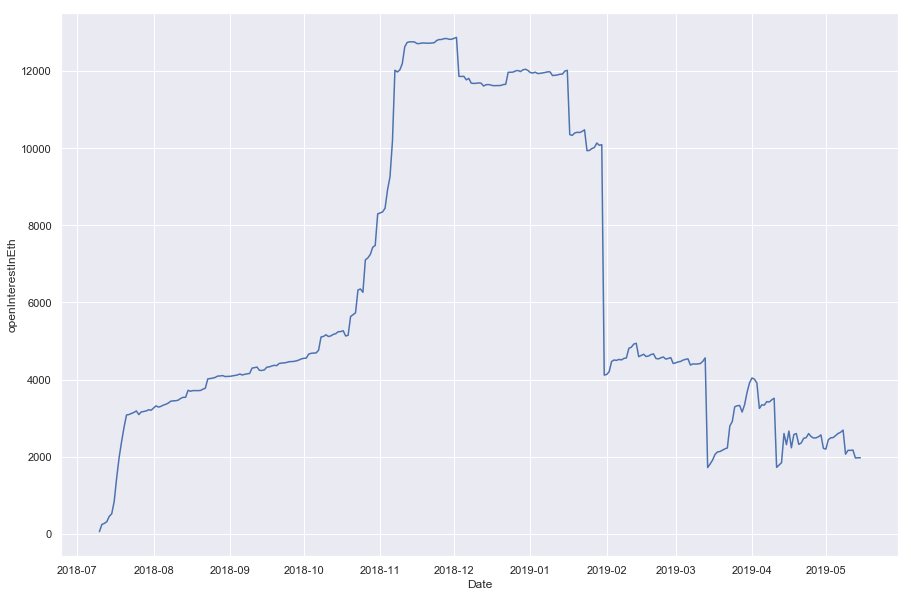

In [81]:
ax = sns.lineplot(x="Date", y="openInterestInEth", data=openInterestInEth, legend="full")
sns.set(rc={'figure.figsize':(10,10)})

#### 

In [62]:
openInterestInEth = pd.read_json("../data/external/AugurJsonFIles/openInterest.json").transpose()
openInterestInEth.reset_index(inplace=True)
openInterestInEth.rename(index=str, columns={"index": "Date"},inplace=True)

In [63]:
openInterestInEth.head()

,Date,openInterestInEth,timestamp
0,2018-07-10,57.819600,1.531267e+09
1,2018-07-11,242.605083,1.531354e+09
2,2018-07-12,269.965183,1.531440e+09
3,2018-07-13,313.847383,1.531526e+09
4,2018-07-14,453.095383,1.531613e+09


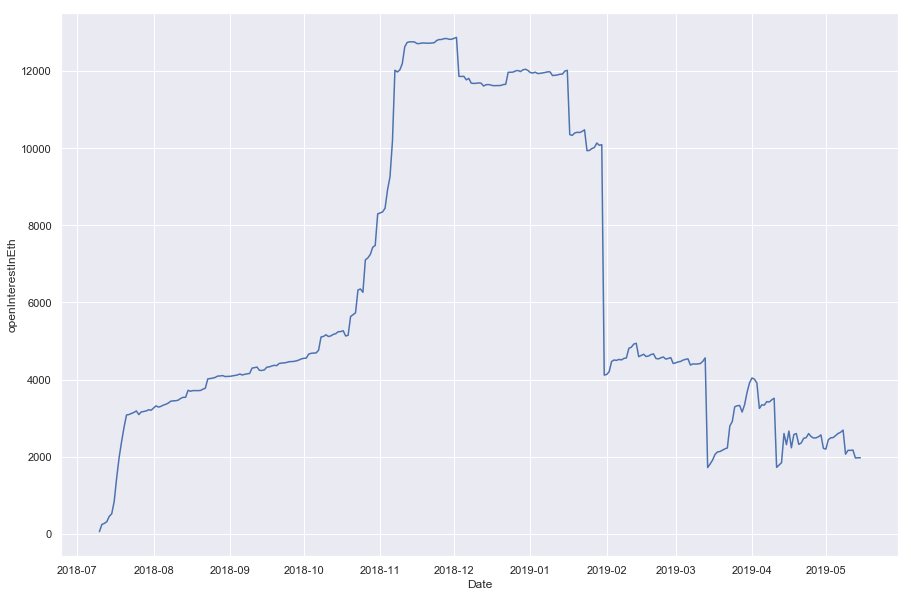

In [81]:
ax = sns.lineplot(x="Date", y="openInterestInEth", data=openInterestInEth, legend="full")
sns.set(rc={'figure.figsize':(10,10)})

In [62]:
openInterestInEth = pd.read_json("../data/external/AugurJsonFIles/openInterest.json").transpose()
openInterestInEth.reset_index(inplace=True)
openInterestInEth.rename(index=str, columns={"index": "Date"},inplace=True)

In [63]:
openInterestInEth.head()

,Date,openInterestInEth,timestamp
0,2018-07-10,57.819600,1.531267e+09
1,2018-07-11,242.605083,1.531354e+09
2,2018-07-12,269.965183,1.531440e+09
3,2018-07-13,313.847383,1.531526e+09
4,2018-07-14,453.095383,1.531613e+09


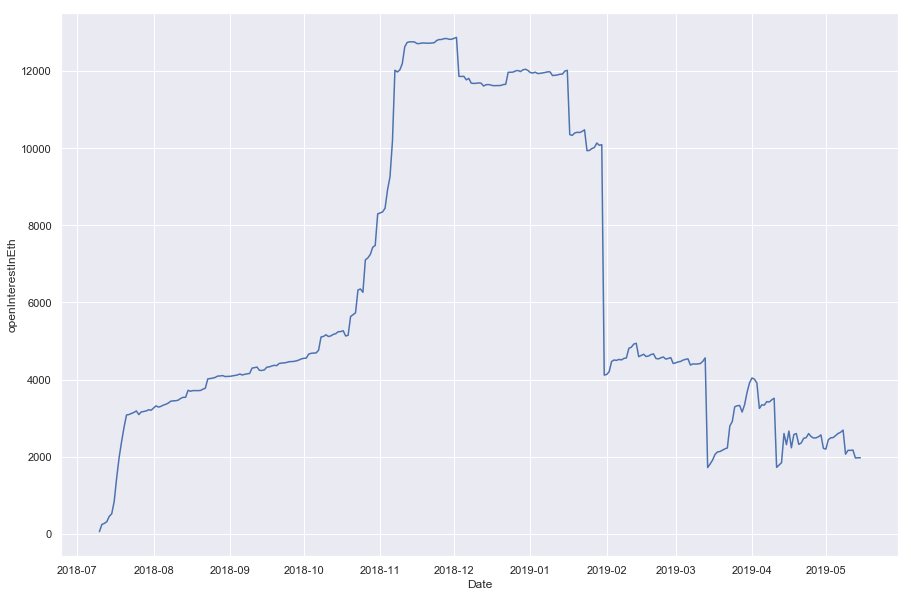

In [81]:
ax = sns.lineplot(x="Date", y="openInterestInEth", data=openInterestInEth, legend="full")
sns.set(rc={'figure.figsize':(10,10)})

In [62]:
openInterestInEth = pd.read_json("../data/external/AugurJsonFIles/openInterest.json").transpose()
openInterestInEth.reset_index(inplace=True)
openInterestInEth.rename(index=str, columns={"index": "Date"},inplace=True)

In [63]:
openInterestInEth.head()

,Date,openInterestInEth,timestamp
0,2018-07-10,57.819600,1.531267e+09
1,2018-07-11,242.605083,1.531354e+09
2,2018-07-12,269.965183,1.531440e+09
3,2018-07-13,313.847383,1.531526e+09
4,2018-07-14,453.095383,1.531613e+09


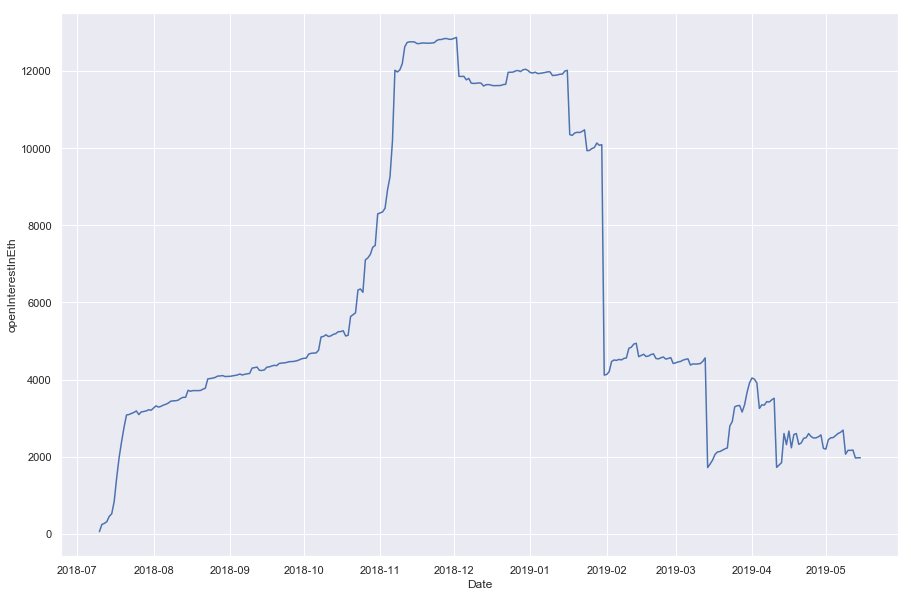

In [81]:
ax = sns.lineplot(x="Date", y="openInterestInEth", data=openInterestInEth, legend="full")
sns.set(rc={'figure.figsize':(10,10)})

In [62]:
openInterestInEth = pd.read_json("../data/external/AugurJsonFIles/openInterest.json").transpose()
openInterestInEth.reset_index(inplace=True)
openInterestInEth.rename(index=str, columns={"index": "Date"},inplace=True)

In [63]:
openInterestInEth.head()

,Date,openInterestInEth,timestamp
0,2018-07-10,57.819600,1.531267e+09
1,2018-07-11,242.605083,1.531354e+09
2,2018-07-12,269.965183,1.531440e+09
3,2018-07-13,313.847383,1.531526e+09
4,2018-07-14,453.095383,1.531613e+09


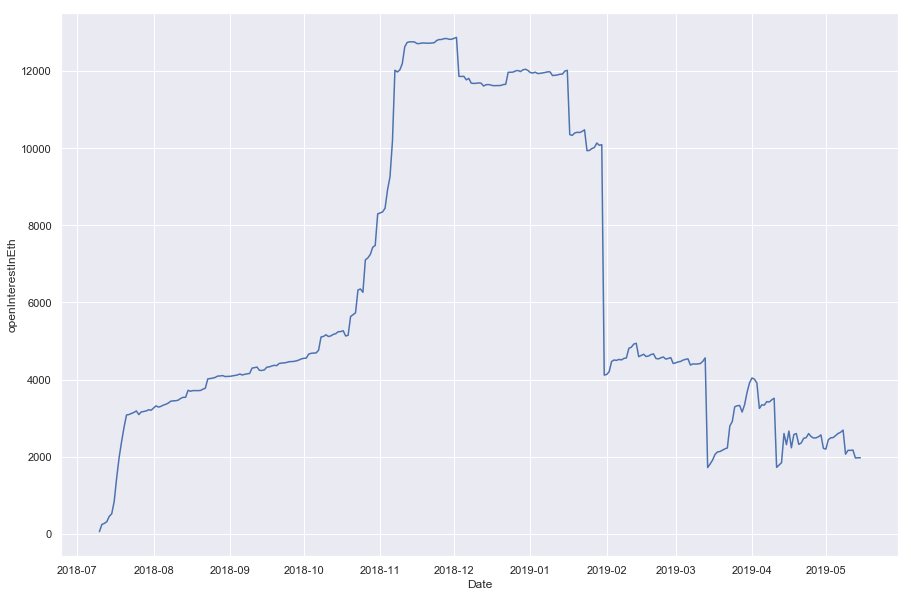

In [81]:
ax = sns.lineplot(x="Date", y="openInterestInEth", data=openInterestInEth, legend="full")
sns.set(rc={'figure.figsize':(10,10)})

In [22]:
sql_query = "select creationFee,reportingFeeRate,marketCreatorFeeRate from markets limit 3000;"
df = pd.read_sql_query(sql_query, conn)
df.describe()

,creationFee,reportingFeeRate,marketCreatorFeeRate
count,2476,2476,2476
unique,42,1,95
top,0.01,0.0001,0.01
freq,1048,2476,884


In [24]:
sql_query = "select openInterest from markets limit 3000;"
df = pd.read_sql_query(sql_query, conn)
df.head()

,openInterest
0,3.9928
1,1.24
2,70.99292175
3,0.01
4,0.1


In [26]:
#Checking consistency of the data by calculating volumes calculated from the table `trades` and the volumes registered in the table `markets`

In [16]:
sql_query = """SELECT
    markets.marketId,
    calculatedVolume as expectedVolume,
    volume as actualVolume,
    abs(1 - cast(calculatedVolume as real)/cast(volume as real)) as diffPercent
FROM markets JOIN
(
    SELECT 
        tr.marketId,
        sum(tr.numCreatorTokens + tr.numFillerTokens  + min(tr.numCreatorShares , tr.numFillerShares) * (mk.maxPrice - mk.minPrice)) as calculatedVolume
    FROM trades as tr
    JOIN markets as mk on mk.marketId= tr.marketId 
group by
    tr.marketId
) cv on markets.marketId = cv.marketId
WHERE
    cast(expectedVolume as real) != cast(actualVolume as real) AND
    abs(1 - cast(expectedVolume as real)/cast(actualVolume as real)) > 0.0001"""

We can use the pandas read_sql_query function to read the results of a SQL query directly into a pandas DataFrame. The below code will execute the query above, and it will return a DataFrame. It has several advantages over the query we did above:

In [24]:
df = pd.read_sql_query(sql_query, conn)
df.head()

,marketId,expectedVolume,actualVolume,diffPercent
0,0x1b8c8c7b62d8a6875cbe95ec36e6257e46745115,537.412408,538.472358,0.001968
1,0x30c1a409258fe44facbfc3d5f89d8f39964f3d13,51.840201,50.47800065394457025,0.026986
2,0x5db57c5028514736edec8464b76903b81fa50136,875.149986,873.947435,0.001376
3,0x6b0eef4addfe1a5e3938fc4511bdb7a2c307d630,975.837116,963.8371156,0.012450
4,0x719c0840d2b076428039f2967697715edfd3c8d5,41.129400,40.0794,0.026198


In [150]:
OI = """SELECT 
                sum(mk.openinterest)
                from markets as mk
                join(select * from market_state where reportingState in('FINALIZED')) as ms
                on mk.marketId=ms.marketId"""

In [151]:
OI = pd.read_sql_query(OI, conn)
OI

,sum(mk.openinterest)
0,12999.777549


In [118]:
top_markets = """SELECT 
                 MK.MARKETID,
                 shortDescription,
                 mk.openInterest
                 from markets as mk
                 join(select * from market_state where reportingState in("FINALIZED"))as ms
                 on mk.marketId=ms.marketId
                 group by mk.marketId
                 order by abs(openinterest) desc
                 limit 10"""

In [119]:
top_markets = pd.read_sql_query(top_markets, conn)


In [122]:
top_markets[["shortDescription","openInterest"]]

,shortDescription,openInterest
0,Will price of Ethereum exceed $500 at the end ...,2500.94380173333341
1,📉 Ethereum Price at end of March 2019?,1768.653100129
2,Will REP token trade above $32 at the end of 2...,1288.03069189683695
3,Will the price of Ethereum exceed $200 at the ...,479.2235
4,Will price of Ethereum exceed $1000 at the end...,453.766
5,💰 Will Eth be above $165 at End of May?,345.359
6,📉 Ethereum Price at End of April 📈,321.1536
7,🏈 OFFICIAL - SUPER BOWL LIII - Will the Patrio...,268.2038
8,English Premier League - Who will score a goal...,240.8
9,Will the Bitcoin (BTC) price exceeds $ 20 000 ...,178.0597326666666


In [149]:
top_markets['openInterest'].astype('float64').sum()

7844.193226425837

In [153]:
7844.19322642583/12999.777549 

0.603409804272323

In [155]:
#Many traders tend not to redeem their winning share

In [9]:
distinct_reporters = """SELECT
    distinct reporter
FROM
    (
        SELECT
            crowdsourcerId,reporter
        FROM
            disputes
    ) AS dp
    JOIN
    (
        SELECT
            crowdsourcerId, payoutId
        FROM
            crowdsourcers
    ) AS cs ON    dp.crowdsourcerId = cs.crowdsourcerId
ORDER BY
    reporter"""

distinct_reporters = pd.read_sql_query(distinct_reporters, conn)
len(distinct_reporters)

291

In [16]:
house_market = """SELECT 
    reporter
    ,CAST(SUM(amountRedeemed/1000000000000000000) AS REAL) AS redeemedRep 
    ,CAST(SUM(repReceived/1000000000000000000) AS REAL) AS receivedRep
FROM 
    crowdsourcer_redeemed AS csr
    JOIN (SELECT crowdsourcerId FROM crowdsourcers WHERE marketId = '0xbbbc0a8baa03535e0a680ee2f057162aaaafd570') AS cs 
    ON csr.crowdsourcer = cs.crowdsourcerId
GROUP BY reporter ORDER BY redeemedRep DESC"""

house_market = pd.read_sql_query(house_market, conn)
house_market

,reporter,redeemedRep,receivedRep
0,0xda46d200053ca2402b4b447cc975da61c744c23a,729.000000,1093.500000
1,0xb2df2d124cc5a4c9e3eaeb9719ce2dcec88e9194,113.500000,170.250000
2,0xf733454bb020b76cfc9c4ad80367bab412edbffb,108.799972,163.199959
3,0xc9c01bc57186a5f0981c4e6f4884beaeb562e532,20.000000,30.000000
4,0x06c68d04aaaf5da137d4a3be785d388bab9f5c23,6.000000,6.000000
5,0xc9eeb9aee357da3cd7ae35b58367d398725339a2,0.000000,0.000000


In [18]:
nondeemed = """select * from tokens where symbol = 'ParticipationToken'"""
nondeemed = pd.read_sql_query(nondeemed, conn)
len(nondeemed)

51

In [123]:
reporter_accuracy = """SELECT
    CASE
        WHEN ir.isDesignatedReporter = 1 THEN "designated reporter"
        WHEN ir.isDesignatedReporter = 0 THEN "open reporter" ELSE "other reporter"
    END AS "initialReporter"
    ,STRFTIME('%Y-%m-%d',DATETIME(bk.timestamp , 'unixepoch')) AS "initialReportingDate(UTC)"
    ,SUM(CASE WHEN po.winning = 1 THEN 1 ELSE 0 END) AS "ReportedOutcomeIsFinalOutcome"
    ,SUM(CASE WHEN po.winning = 0 THEN 1 ELSE 0 END) AS "ReportedOutcomeIsNotFinalOutcome"    
FROM 
    (SELECT marketId, blockNumber, isDesignatedReporter FROM initial_reports ) AS ir 
    JOIN
    (SELECT marketId, winning FROM payouts ) AS po 
    ON ir. marketId = po.marketId
    JOIN
    (SELECT marketId, marketStateId FROM markets ) AS mk 
    ON ir.marketId = mk.marketId
    JOIN
    (SELECT marketStateId, marketId FROM market_state WHERE reportingState IN ('AWAITING_FINALIZATION', 'FINALIZED')) AS ms 
    ON mk.marketId = ms.marketId AND mk.marketStateId = ms.marketStateId
    JOIN
    (SELECT timestamp,blockNumber FROM blocks) AS bk ON ir.blockNumber = bk.blockNumber
GROUP BY
    "initialReporter", "initialReportingDate(UTC)"
ORDER BY
    "initialReporter", "initialReportingDate(UTC)"
    """

In [76]:
reporters_df = pd.read_sql_query(reporter_accuracy, conn)
reporters_df.head()

NameError: name 'reporter_accuracy' is not defined

In [125]:
reporters_df["disagreement"] = reporters_df.apply(lambda x: x['ReportedOutcomeIsFinalOutcome']- x['ReportedOutcomeIsNotFinalOutcome'],axis =1)

In [134]:
reporters_df.disagreement.value_counts(normalize=True,bins=[-200,0,200])

(0.0, 200.0]       0.922018
(-200.001, 0.0]    0.077982
Name: disagreement, dtype: float64

In [131]:
no_show_rate = """SELECT
designatedReportStake AS "designatedReportStake[REP]"
,MAX(CASE WHEN  isDesignatedReporter = 0 THEN numberOfMarkets ELSE 0 END) AS "numberOfMarkets(no-show)"
,MAX(CASE WHEN  isDesignatedReporter = 1 THEN numberOfMarkets ELSE 0 END) AS "numberOfMarkets(designated)"
,SUM(numberOfMarkets) as "numberOfMarkets(total)"
,(CAST(MAX(CASE WHEN  isDesignatedReporter = 0 THEN numberOfMarkets ELSE 0 END) AS FLOAT)/SUM(numberOfMarkets))*100 AS "no-show rate[%]"
FROM(
SELECT
CAST(designatedReportStake AS FLOAT) AS designatedReportStake
,isDesignatedReporter
,COUNT(*) AS "numberOfMarkets"
FROM(
SELECT
designatedReportStake
,isDesignatedReporter
FROM
initial_reports AS ir
JOIN (
SELECT
marketID,designatedReportStake
FROM
markets
WHERE
universe = '0xe991247b78f937d7b69cfc00f1a487a293557677'
) AS  mk ON ir.marketId = mk.marketId )
GROUP BY
designatedReportStake, isDesignatedReporter)
GROUP BY
designatedReportStake
ORDER BY designatedReportStake"""

In [132]:
noshow_df = pd.read_sql_query(no_show_rate, conn)
noshow_df.head()

,designatedReportStake,numberOfMarkets(no-show),numberOfMarkets(designated),numberOfMarkets(total),no-show rate
0,0.349681,394,363,757,52.047556
1,0.510140,13,18,31,41.935484
2,0.511717,35,37,72,48.611111
3,0.592696,24,17,41,58.536585
4,0.762634,7,14,21,33.333333


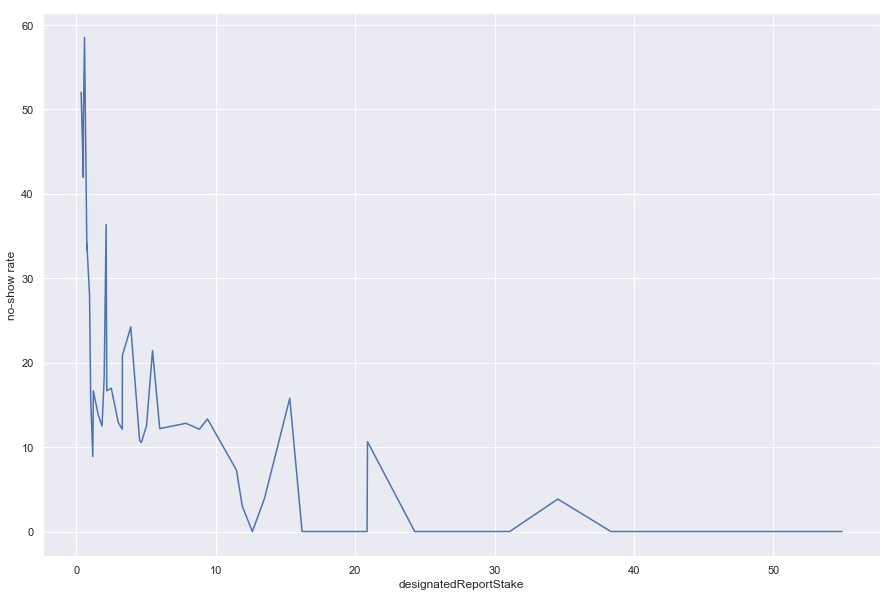

In [136]:
ax = sns.lineplot(x="designatedReportStake", y="no-show rate", data=noshow_df, legend="full")
sns.set(rc={'figure.figsize':(10,10)})

In [137]:
bots = """SELECT
            reporter as openReporter
            ,count(*) as numberOfMarkets
          FROM
              initial_reports
          WHERE
              isDesignatedReporter = 0
          GROUP BY
              reporter
          ORDER BY
              numberOfMarkets DESC
        """

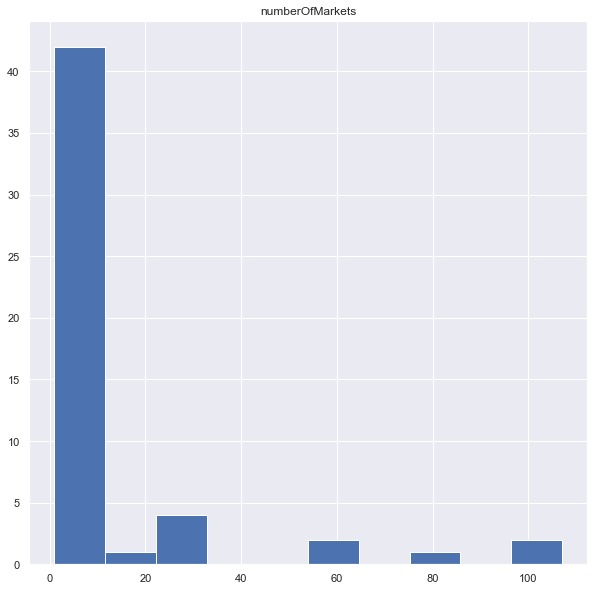

In [139]:
bots_df = pd.read_sql_query(bots, conn)
bots_df.hist()
sns.set(rc={'figure.figsize':(10,10)})

In [19]:
#correlation between DR bond size and no-show rate

In [4]:
bondsize_noshow = """SELECT
designatedReportStake AS "designatedReportStake[REP]"
,MAX(CASE WHEN  isDesignatedReporter = 0 THEN numberOfMarkets ELSE 0 END) AS "numberOfMarkets(no-show)"
,MAX(CASE WHEN  isDesignatedReporter = 1 THEN numberOfMarkets ELSE 0 END) AS "numberOfMarkets(designated)"
,SUM(numberOfMarkets) as "numberOfMarkets(total)"
,(CAST(MAX(CASE WHEN  isDesignatedReporter = 0 THEN numberOfMarkets ELSE 0 END) AS FLOAT)/SUM(numberOfMarkets))*100 AS "no-show rate[%]"
FROM(
SELECT
CAST(designatedReportStake AS FLOAT) AS designatedReportStake
,isDesignatedReporter
,COUNT(*) AS "numberOfMarkets"
FROM(
SELECT
designatedReportStake
,isDesignatedReporter
FROM
initial_reports AS ir
JOIN (
SELECT
marketID,designatedReportStake
FROM
markets
WHERE
universe = '0xe991247b78f937d7b69cfc00f1a487a293557677'
) AS  mk ON ir.marketId = mk.marketId )
GROUP BY
designatedReportStake, isDesignatedReporter)
GROUP BY
designatedReportStake
ORDER BY designatedReportStake""" 
bondsize_noshow = pd.read_sql_query(bondsize_noshow, conn)
bondsize_noshow.sort_values(by=['designatedReportStake'],inplace=True)

NameError: name 'pd' is not defined

In [138]:
"""drop view if exists home_page_stats_daily cascade;
create view home_page_stats_daily as 

        with trades_sub as (
            select
	        "numCreatorTokens"::numeric(38,10) + "numFillerTokens"::numeric(38,10)
                + least("numCreatorShares"::numeric(38,10), "numFillerShares"::numeric(38,10))
                * (m."maxPrice"::numeric(38,10) - m."minPrice"::numeric(38,10)) as volume
	        , date '1970-01-01' + interval '1 second' * b.timestamp as trade_time
            , t."marketId"
	        from trades t
	        inner join blocks b
	        on t."blockNumber" = b."blockNumber"
            inner join markets m
            on m."marketId" = t."marketId"
        ),
        users_sub as (
            select
	        "numCreatorTokens"::numeric(38,10) + "numFillerTokens"::numeric(38,10) as volume
	        , date '1970-01-01' + interval '1 second' * b.timestamp as trade_time
            , filler as account
	        from trades t
	        inner join blocks b
	        on t."blockNumber" = b."blockNumber"

            union all

            select
	        "numCreatorTokens"::numeric(38,10) + "numFillerTokens"::numeric(38,10) as volume
	        , date '1970-01-01' + interval '1 second' * b.timestamp as trade_time
            , creator as account
	        from trades t
	        inner join blocks b
	        on t."blockNumber" = b."blockNumber"
        ),
        new_markets as (
            select
	        date '1970-01-01' + interval '1 second' * b.timestamp as trade_time
	        from blocks b
            inner join markets m
            on m."creationBlockNumber" = b."blockNumber"
        ), 
        orders as (
            select
	        "originalTokensEscrowed"::numeric(38,10) as eth
	        , date '1970-01-01' + interval '1 second' * b.timestamp as trade_time
	        from orders o
	        inner join blocks b
	        on o."blockNumber" = b."blockNumber"
        )
        
        select
        activity_Day
        , to_char(activity_day, 'MM/DD/YYYY') as "date"
        , sum(case when stat_name = 'volume' then total else 0 end) as volume
        , sum(case when stat_name = 'activeMarkets' then total else 0 end) as "activeMarkets"
        , sum(case when stat_name = 'traders' then total else 0 end) as traders
        , sum(case when stat_name = 'newMarkets' then total else 0 end) as "newMarkets"
        , sum(case when stat_name = 'newOrders' then total else 0 end) as "newOrders"
        from (
            select
            'volume' as stat_name
            , date_trunc('day', trade_time) as activity_day
            , sum(volume) as total
            from trades_sub
            group by activity_day

            union all

            select 
            'activeMarkets' as stat_name
            , date_trunc('day', trade_time) as activity_day
            , count(distinct "marketId") as total
            from trades_sub
            group by activity_day

            union all

            select
            'traders' as stat_name
            , date_trunc('day', trade_time) as activity_day
            , count(distinct account) as total
            from users_sub
            group by activity_day

            union all

            select
            'newMarkets' as stat_name
            , date_trunc('day', trade_time) as activity_day
            , sum(1) as total
            from new_markets
            group by activity_day

            union all

            select
            'newOrders' as stat_name
            , date_trunc('day', trade_time) as activity_day
            , sum(1) as total
            from trades_sub
            group by activity_day
        ) foo 
        where activity_day <> date_trunc('day', now())
        group by activity_day, to_char(activity_day, 'MM/DD/YYYY') order by activity_day"""